<a href="https://colab.research.google.com/github/Kwonjimin/2021_Data_study/blob/main/%EA%B8%88%EC%9C%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B0%95%EC%9D%98_3%EA%B0%95_%EC%9B%B9_%EC%8A%A4%ED%81%AC%EB%9E%98%EC%9D%B4%ED%95%91%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 크롤링


## HTML
태크란 정보를 정의하는 형식을 말합니다.


## BeautifulSoup

In [1]:
!pip install beautifulSoup4

In [3]:
from bs4 import BeautifulSoup

## 크롤링

In [7]:
import pandas as pd
from datetime import datetime 
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

In [8]:
import requests

In [22]:
url='https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'

In [23]:
headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'} #https:hogni.tistory.com/64
response=requests.get(url, headers=headers)

In [24]:
response.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 금융</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210803162128/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210803162128/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210803162128/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210803162128/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210803162128/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210803162128/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210803162128/css/world.css">\n</head>\n<body>\n<script

In [25]:
from bs4 import BeautifulSoup as bs
html=bs(response.text, 'html.parser')
html_table=html.select("table")

In [26]:
table=pd.read_html(str(html_table)) #pd.read_html: 테이블을 데이터프레임으로 저장해줌
table[0].dropna() #결측값 제거

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.08.09,266000.0,5500.0,270500.0,271000.0,264500.0,346417.0
2,2021.08.06,271500.0,2500.0,271000.0,273000.0,267500.0,332369.0
3,2021.08.05,269000.0,500.0,270000.0,275000.0,268500.0,411854.0
4,2021.08.04,269500.0,4500.0,265000.0,272500.0,264500.0,497787.0
5,2021.08.03,265000.0,1500.0,263500.0,265000.0,260500.0,279936.0
9,2021.08.02,263500.0,10000.0,255500.0,264000.0,255500.0,459181.0
10,2021.07.30,253500.0,8000.0,261500.0,262000.0,253500.0,627804.0
11,2021.07.29,261500.0,0.0,261500.0,263500.0,261000.0,234784.0
12,2021.07.28,261500.0,2000.0,263500.0,265000.0,260500.0,333216.0
13,2021.07.27,263500.0,500.0,266500.0,269000.0,262500.0,293542.0


In [27]:
table[1] #원하지 않는 데이터 프레임

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [29]:
df=pd.DataFrame()
sise_url='https://finance.naver.com/item/sise_day.nhn?code=068270'
for page in range(1,100):
   page_url='{}&page'.format(sise_url, page)
   print(page_url)
   
   # 위의 내용 반복
   response=requests.get(url, headers=headers)
   html=bs(response.text, 'html.parser')
   html_table=html.select("table")
   
   #append 기능으로 추가
   df=df.append(table[0].dropna())

https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.com/item/sise_day.nhn?code=068270&page
https://finance.naver.co

In [30]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.08.09,266000.0,5500.0,270500.0,271000.0,264500.0,346417.0
2,2021.08.06,271500.0,2500.0,271000.0,273000.0,267500.0,332369.0
3,2021.08.05,269000.0,500.0,270000.0,275000.0,268500.0,411854.0
4,2021.08.04,269500.0,4500.0,265000.0,272500.0,264500.0,497787.0
5,2021.08.03,265000.0,1500.0,263500.0,265000.0,260500.0,279936.0
...,...,...,...,...,...,...,...
9,2021.08.02,263500.0,10000.0,255500.0,264000.0,255500.0,459181.0
10,2021.07.30,253500.0,8000.0,261500.0,262000.0,253500.0,627804.0
11,2021.07.29,261500.0,0.0,261500.0,263500.0,261000.0,234784.0
12,2021.07.28,261500.0,2000.0,263500.0,265000.0,260500.0,333216.0


In [31]:
#최근 데이터 30행만 사용
df=df.dropna()
df=df.iloc[0:30] #상위 30개만 사용
df=df.sort_values(by='날짜')

In [32]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2021.07.27,263500.0,500.0,266500.0,269000.0,262500.0,293542.0
13,2021.07.27,263500.0,500.0,266500.0,269000.0,262500.0,293542.0
13,2021.07.27,263500.0,500.0,266500.0,269000.0,262500.0,293542.0
12,2021.07.28,261500.0,2000.0,263500.0,265000.0,260500.0,333216.0
12,2021.07.28,261500.0,2000.0,263500.0,265000.0,260500.0,333216.0
12,2021.07.28,261500.0,2000.0,263500.0,265000.0,260500.0,333216.0
11,2021.07.29,261500.0,0.0,261500.0,263500.0,261000.0,234784.0
11,2021.07.29,261500.0,0.0,261500.0,263500.0,261000.0,234784.0
11,2021.07.29,261500.0,0.0,261500.0,263500.0,261000.0,234784.0
10,2021.07.30,253500.0,8000.0,261500.0,262000.0,253500.0,627804.0


In [33]:
len(df)

30

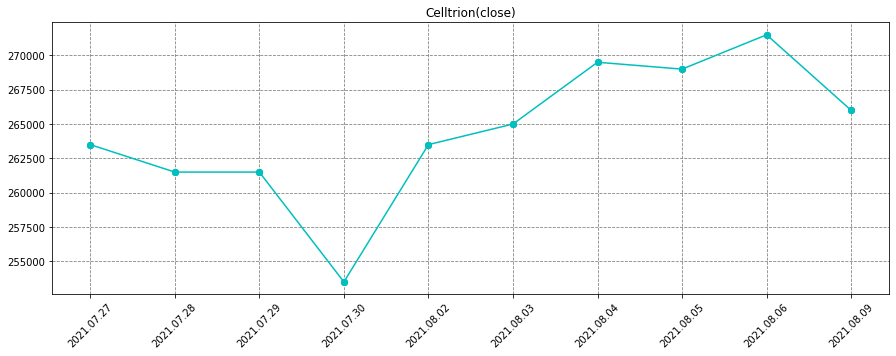

In [35]:
plt.figure(figsize=(15,5))
plt.title('Celltrion(close)')
plt.xticks(rotation=45) #x축이 겹쳐 보이기 때문에 입력
plt.plot(df['날짜'],df['종가'], 'co-') #좌표를 청록색 원으로
plt.grid(color='gray', linestyle='--')
plt.show()

## 신버들 캔들차틀

In [36]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 618 kB/s 


In [37]:
import mplfinance as mpf

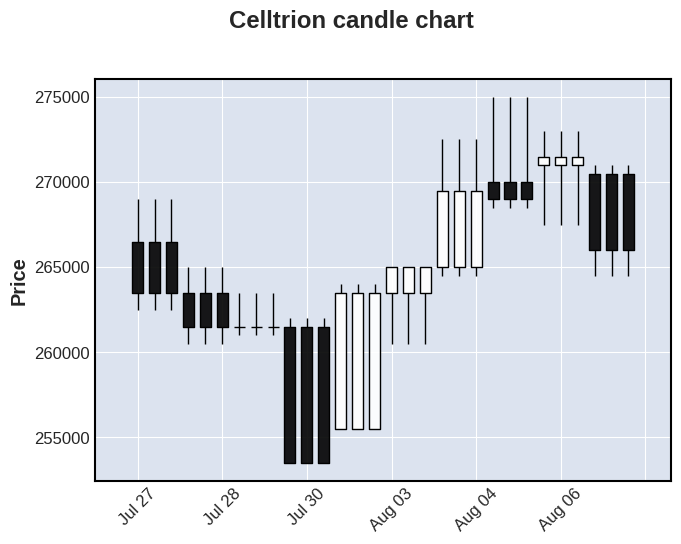

In [38]:
df=df.rename(columns={'날짜':'Date', '시가':'Open', '고가': 'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})

df=df.sort_values(by='Date')

df.index=pd.to_datetime(df.Date)

df=df[['Open', 'High', 'Low', 'Close', 'Volume']]

mpf.plot(df, title='Celltrion candle chart', type='candle')

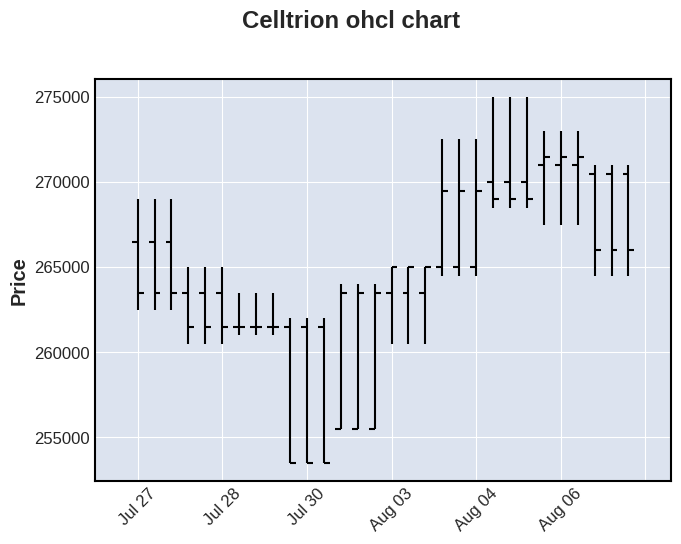

In [39]:
mpf.plot(df, title='Celltrion ohcl chart', type='ohlc')